In [1]:
from datascience import *
path_data = '../../../assets/data/'
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# O Problema de Monty Hall
Este [problema](https://en.wikipedia.org/wiki/Monty_Hall_problem) tem confundido muitas pessoas ao longo dos anos, [incluindo matemáticos](https://web.archive.org/web/20140413131827/http://www.decisionsciences.org/DecisionLine/Vol30/30_1/vazs30_1.pdf). Vamos ver se conseguimos resolvê-lo por meio de simulação.

O cenário é derivado de um programa de televisão chamado "Let's Make a Deal". Monty Hall apresentou este programa nos anos 60, e desde então gerou vários spin-offs. Uma parte emocionante do programa era que, enquanto os participantes tinham a chance de ganhar grandes prêmios, eles poderiam acabar com "zonks" que eram menos desejáveis. Esta é a base para o que agora é conhecido como *o problema de Monty Hall*.

O cenário é um game show no qual o participante se depara com três portas fechadas. Atrás de uma das portas está um carro luxuoso, e atrás de cada uma das outras duas há um bode. O participante não sabe onde está o carro e deve tentar encontrá-lo sob as seguintes regras.

- O participante faz uma escolha inicial, mas essa porta não é aberta.
- Pelo menos uma das outras duas portas deve ter um bode atrás dela. Monty abre uma dessas portas para revelar um bode, exibido em toda a sua glória na [Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem):

![Monty Hall goat](../../../images/monty_hall_goat.png)

- Restam duas portas, uma das quais era a escolha original do participante. Uma das portas tem o carro atrás dela, e a outra tem um bode. O participante agora pode escolher qual das duas portas abrir.

O participante tem uma decisão a tomar. Qual porta ela deve escolher para abrir, se quiser o carro? Ela deve manter sua escolha inicial ou trocar para a outra porta? Esse é o problema de Monty Hall.

## A Solução

Em qualquer problema envolvendo chances, as suposições sobre aleatoriedade são importantes. É razoável supor que há uma chance de 1/3 de que a escolha inicial do participante seja a porta que tem o carro atrás dela. 

A solução para o problema é bastante direta sob essa suposição, embora a solução direta não convença a todos. Aqui está ela de qualquer maneira.

- A chance de que o carro esteja atrás da porta escolhida inicialmente é de 1/3.
- O carro está atrás da porta escolhida inicialmente ou da porta que resta. Não pode estar em outro lugar.
- Portanto, a chance de que o carro esteja atrás da porta que resta é de 2/3.
- Portanto, o participante deve trocar.

É isso. Fim da história. 

Não está convencido? Então vamos simular o jogo e ver como os resultados se desenrolam.

## Simulação
A simulação será mais complexa do que as que fizemos até agora. Vamos dividi-la.

**Passo 1: O que Simular**

Para cada jogo, vamos simular o que está atrás das três portas:
- a que o participante escolhe primeiro
- a que Monty abre
- a porta restante

Assim, vamos acompanhar três quantidades, não apenas uma.

**Passo 2: Simulando um Jogo**

Como é frequente em simulações de jogos, a maior parte do trabalho consiste em simular uma partida do jogo. Isso envolve várias partes.

**Os bodes:** Começamos configurando uma array `goats` que contém nomes pouco imaginativos para os dois bodes.

In [2]:
goats = make_array('first goat', 'second goat')

Para ajudar Monty a conduzir o jogo, teremos que identificar qual cabra está selecionada e qual está revelada atrás da porta aberta. A função `other_goat` pega uma cabra e devolve a outra.

In [3]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [4]:
other_goat('first goat'), other_goat('second goat'), other_goat('watermelon')

('second goat', 'first goat', None)

A string `watermelon` não é o nome de uma das cabras, então quando `watermelon` é a entrada, `other_goat` não faz nada.

**As opções:** O array `hidden_behind_doors` contém as três coisas que são
atrás das portas.

In [5]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'], dtype='<U11')

Agora estamos prontos para simular uma jogada. Para fazer isso, vamos definir uma função `monty_hall_game` que não recebe argumentos. Quando a função é chamada, ela joga o jogo de Monty uma vez e retorna uma lista consistindo de:

- a escolha do participante
- o que Monty revela quando ele abre uma porta
- o que permanece atrás da outra porta

O jogo começa com o participante escolhendo uma porta aleatoriamente. Ao fazer isso, o participante faz uma escolha aleatória entre o primeiro bode, o segundo bode e o carro.

Se o participante escolher um dos bodes, então o outro bode é revelado e o carro está atrás da porta restante.

Se o participante escolher o carro, então Monty revela um dos bodes e o outro bode está atrás da porta restante.

In [6]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

Vamos brincar! Execute a célula várias vezes e veja como os resultados mudam.

In [7]:
monty_hall_game()

['car', 'first goat', 'second goat']

**Passo 3: Número de Repetições**

Para medir a frequência com que os diferentes resultados ocorrem, precisamos jogar o jogo muitas vezes e coletar os resultados. Vamos executar 10.000 repetições.

**Passo 4: Simulando Múltiplas Repetições**

É hora de rodar toda a simulação. Mas, ao contrário das nossas simulações anteriores, em que cada simulação produzia um único valor, neste exemplo simulamos uma lista de três valores cada vez.

Vamos tratar essa lista simulada como uma linha de uma tabela. Então, em vez de começar com uma array vazia e aumentá-la com cada novo valor simulado, começaremos com uma tabela vazia
e aumentaremos a tabela com cada nova linha simulada. Cada linha conterá o resultado completo de um jogo.

Uma maneira de aumentar uma tabela adicionando uma nova linha é usar o método `append`. Se `my_table` for uma tabela e `new_row` for uma lista contendo os elementos de uma nova linha, então `my_table.append(new_row)` adiciona a nova linha ao final de `my_table`.

Note que `append` não cria uma nova tabela. Ele altera `my_table` para ter uma linha a mais do que tinha antes.

Começaremos com uma tabela de coleta `games` que possui três colunas vazias. Podemos fazer isso apenas especificando uma lista de rótulos de coluna na mesma ordem em que `monty_hall_game` retorna o resultado de um jogo.

Agora podemos adicionar 10.000 linhas a `games`. Cada linha representará o resultado de uma jogada do jogo de Monty.

In [8]:
# tabela de coleção vazia
games = Table(['Guess', 'Revealed', 'Remaining'])

# Jogue o jogo 10.000 vezes e 
# registre os resultados nos jogos de mesa

for i in np.arange(10000):
    games.append(monty_hall_game())

A simulação está concluída. Observe como o código é curto. A maior parte do trabalho foi feita na simulação do resultado de um jogo.

In [9]:
games.show(3)

Guess,Revealed,Remaining
first goat,second goat,car
first goat,second goat,car
car,first goat,second goat


## Visualização

Para ver se o competidor deve manter sua escolha ou troca original, vamos ver com que frequência o carro fica atrás de cada uma de suas duas opções.

Não é nenhuma surpresa que as três portas apareçam com a mesma frequência que a suposição original do competidor.

In [10]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3319
first goat,3311
second goat,3370


Depois que Monty eliminou uma cabra, com que frequência o carro fica atrás da porta restante?

In [11]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6681
first goat,1676
second goat,1643


Como disse nossa solução anterior, o carro fica atrás da porta restante dois terços do tempo, com uma boa aproximação. O competidor tem duas vezes mais chances de conseguir o carro se trocar do que se continuar com sua escolha original. n
Para ver isso graficamente, podemos juntar as duas tabelas acima e desenhar gráficos de barras sobrepostos.

In [12]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3319,6681
first goat,3311,1676
second goat,3370,1643


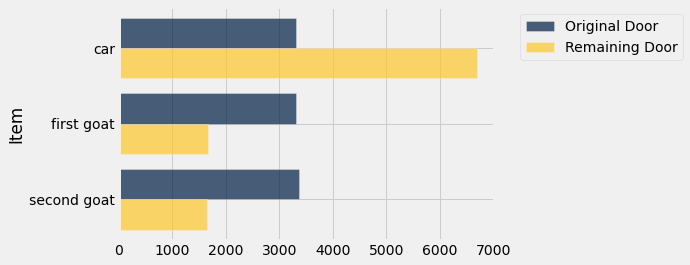

In [13]:
combined.barh(0)

Observe como as três barras azuis são quase iguais – a escolha original tem a mesma probabilidade de ser qualquer um dos três itens disponíveis. Mas a barra dourada correspondente a `Car` é duas vezes mais longa que a azul. 

A simulação confirma que a competidora tem duas vezes mais chances de vencer se mudar.